In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

# Bisection method---------------------------------------------------------------------
def bisection_method(f, a, b, tolerance=1e-6, max_iterations=100):
    """
    Implements the Bisection Method for finding roots of equations.
    
    Parameters:
    -----------
    f : function
        The function for which we want to find the root
    a : float
        Left endpoint of the interval
    b : float
        Right endpoint of the interval
    tolerance : float
        Acceptable error tolerance (default: 1e-6)
    max_iterations : int
        Maximum number of iterations allowed (default: 100)
    
    Returns:
    --------
    root : float
        The estimated root
    iterations : int
        Number of iterations performed
    error : float
        Final error estimate
    history : list
        List of dictionaries containing iteration data
    """
    
   
    if f(a) * f(b) >= 0:
        print("Error: f(a) and f(b) must have opposite signs!")
        return None, 0, None, []
    
   
    iteration = 0
    history = []  
    
 
    while iteration < max_iterations:

        c = (a + b) / 2
        
        
        fa = f(a)
        fb = f(b)
        fc = f(c)
        
   
        error = (b - a) / 2
   
        history.append({
            'Iteration': iteration + 1,
            'a': a,
            'b': b,
            'c': c,
            'f(a)': fa,
            'f(b)': fb,
            'f(c)': fc,
            'Error': error
        })
        
      
        if abs(fc) < tolerance or error < tolerance:
            print(f"Root found after {iteration + 1} iterations!")
            return c, iteration + 1, error, history
        
  
        if fa * fc < 0:
        
            b = c
        else:
           
            a = c
        
        iteration += 1
    

    print(f"Maximum iterations ({max_iterations}) reached!")
    c = (a + b) / 2
    return c, max_iterations, (b - a) / 2, history


# EXAMPLE FUNCTION TO TEST---------------------------------------------------------------------

def example_function(x):
    """
    Example function: f(x) = x^3 - x - 2
    This function has a root near x = 1.5
    """
    return x**3 - x - 2



# RUN THE BISECTION METHOD-------------------------------------------------------------


print("=" * 70)
print("BISECTION METHOD - ROOT FINDING")
print("=" * 70)
print(f"\nFunction: f(x) = x³ - x - 2")
print(f"Interval: [1, 2]")
print(f"Tolerance: 1e-6")
print(f"Max Iterations: 100\n")

# Execute bisection method
root, iterations, final_error, history = bisection_method(
    f=example_function,
    a=1,
    b=2,
    tolerance=1e-6,
    max_iterations=100
)


BISECTION METHOD - ROOT FINDING

Function: f(x) = x³ - x - 2
Interval: [1, 2]
Tolerance: 1e-6
Max Iterations: 100

Root found after 20 iterations!


In [3]:
# DISPLAY RESULTS--------------------------------------------------


print("\n" + "=" * 70)
print("RESULTS")
print("=" * 70)
print(f"Estimated Root: {root:.10f}")
print(f"Number of Iterations: {iterations}")
print(f"Final Error: {final_error:.10e}")
print(f"f(root) = {example_function(root):.10e}")
print("=" * 70)


RESULTS
Estimated Root: 1.5213804245
Number of Iterations: 20
Final Error: 9.5367431641e-07
f(root) = 4.2658294048e-06



ITERATION TABLE
 Iteration          a          b          c        f(a)       f(b)        f(c)      Error
         1 1.00000000 2.00000000 1.50000000 -2.00000000 4.00000000 -0.12500000 0.50000000
         2 1.50000000 2.00000000 1.75000000 -0.12500000 4.00000000  1.60937500 0.25000000
         3 1.50000000 1.75000000 1.62500000 -0.12500000 1.60937500  0.66601562 0.12500000
         4 1.50000000 1.62500000 1.56250000 -0.12500000 0.66601562  0.25219727 0.06250000
         5 1.50000000 1.56250000 1.53125000 -0.12500000 0.25219727  0.05911255 0.03125000
         6 1.50000000 1.53125000 1.51562500 -0.12500000 0.05911255 -0.03405380 0.01562500
         7 1.51562500 1.53125000 1.52343750 -0.03405380 0.05911255  0.01225042 0.00781250
         8 1.51562500 1.52343750 1.51953125 -0.03405380 0.01225042 -0.01097125 0.00390625
         9 1.51953125 1.52343750 1.52148438 -0.01097125 0.01225042  0.00062218 0.00195312
        10 1.51953125 1.52148438 1.52050781 -0.01097125 0.00062218 -0.00517889 0.00

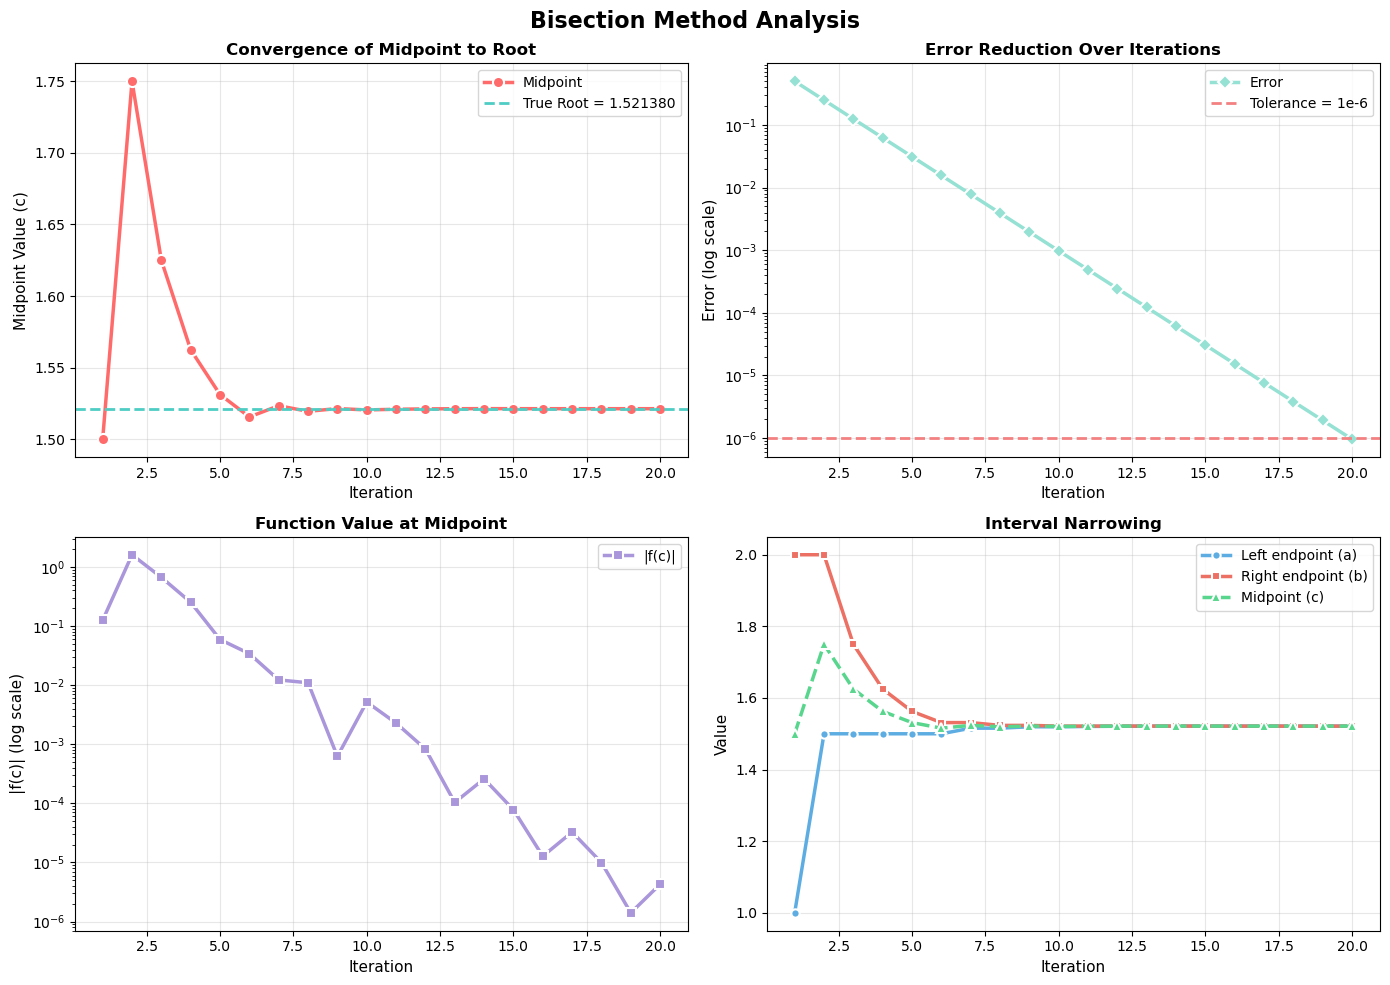

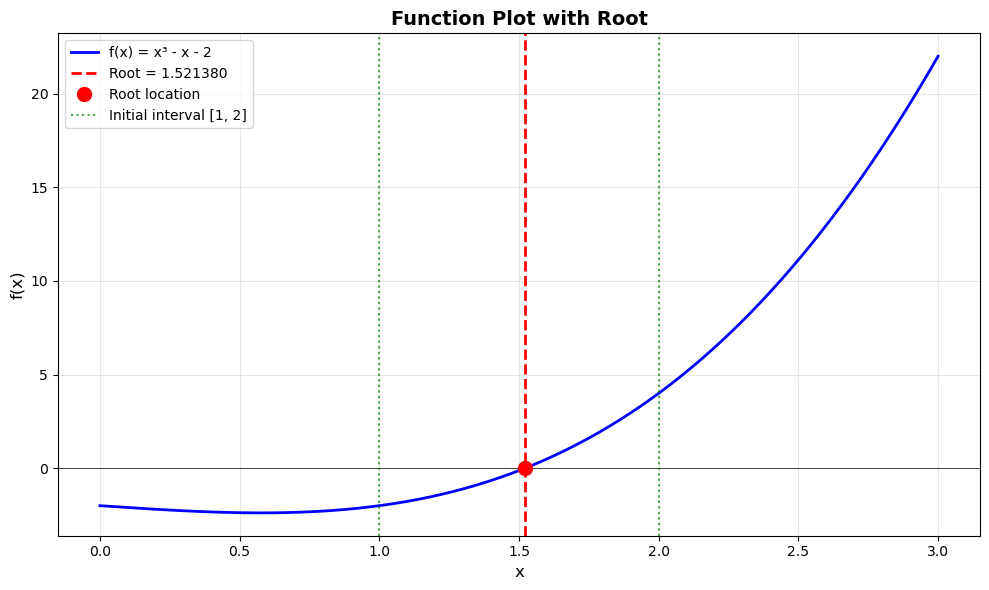

In [5]:
# DISPLAY ITERATION TABLE--------------------------------------------------------------------------


print("\n" + "=" * 70)
print("ITERATION TABLE")
print("=" * 70)

df = pd.DataFrame(history)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)


print(df.to_string(index=False, float_format=lambda x: f'{x:.8f}'))


# VISUALIZATION - CONVERGENCE GRAPH-----------------------------------------------------------------------------------


# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Bisection Method Analysis', fontsize=16, fontweight='bold')

# Extract data for plotting
iterations_list = [h['Iteration'] for h in history]
midpoints = [h['c'] for h in history]
errors = [h['Error'] for h in history]
f_values = [abs(h['f(c)']) for h in history]

# Plot 1: Convergence of Midpoints
axes[0, 0].plot(iterations_list, midpoints, color='#FF6B6B', marker='o', 
                linewidth=2.5, markersize=8, markerfacecolor='#FF6B6B', 
                markeredgecolor='white', markeredgewidth=1.5, label='Midpoint')
axes[0, 0].axhline(y=root, color='#4ECDC4', linestyle='--', linewidth=2, 
                   label=f'True Root = {root:.6f}')
axes[0, 0].set_xlabel('Iteration', fontsize=11)
axes[0, 0].set_ylabel('Midpoint Value (c)', fontsize=11)
axes[0, 0].set_title('Convergence of Midpoint to Root', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()

# Plot 2: Error Reduction
axes[0, 1].semilogy(iterations_list, errors, color='#95E1D3', marker='D', 
                    linewidth=2.5, markersize=7, markerfacecolor='#95E1D3', 
                    markeredgecolor='white', markeredgewidth=1.5, label='Error')
axes[0, 1].axhline(y=1e-6, color='#F38181', linestyle='--', linewidth=2, 
                   label='Tolerance = 1e-6')
axes[0, 1].set_xlabel('Iteration', fontsize=11)
axes[0, 1].set_ylabel('Error (log scale)', fontsize=11)
axes[0, 1].set_title('Error Reduction Over Iterations', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend()

# Plot 3: |f(c)| values
axes[1, 0].semilogy(iterations_list, f_values, color='#AA96DA', marker='s', 
                    linewidth=2.5, markersize=7, markerfacecolor='#AA96DA', 
                    markeredgecolor='white', markeredgewidth=1.5, label='|f(c)|')
axes[1, 0].set_xlabel('Iteration', fontsize=11)
axes[1, 0].set_ylabel('|f(c)| (log scale)', fontsize=11)
axes[1, 0].set_title('Function Value at Midpoint', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend()

# Plot 4: Interval Narrowing Visualization
axes[1, 1].plot(iterations_list, [h['a'] for h in history], color='#5DADE2', 
                linewidth=2.5, label='Left endpoint (a)', marker='o', markersize=6,
                markerfacecolor='#5DADE2', markeredgecolor='white', markeredgewidth=1.5)
axes[1, 1].plot(iterations_list, [h['b'] for h in history], color='#EC7063', 
                linewidth=2.5, label='Right endpoint (b)', marker='s', markersize=6,
                markerfacecolor='#EC7063', markeredgecolor='white', markeredgewidth=1.5)
axes[1, 1].plot(iterations_list, midpoints, color='#58D68D', linestyle='--',
                linewidth=2.5, label='Midpoint (c)', marker='^', markersize=7,
                markerfacecolor='#58D68D', markeredgecolor='white', markeredgewidth=1.5)
axes[1, 1].set_xlabel('Iteration', fontsize=11)
axes[1, 1].set_ylabel('Value', fontsize=11)
axes[1, 1].set_title('Interval Narrowing', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend()

plt.tight_layout()
plt.show()


# Plot the function and show the root
x = np.linspace(0, 3, 1000)
y = example_function(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2, label='f(x) = x³ - x - 2')
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.axvline(x=root, color='r', linestyle='--', linewidth=2, label=f'Root = {root:.6f}')
plt.plot(root, 0, 'ro', markersize=10, label='Root location')

# Mark the initial interval
plt.axvline(x=1, color='g', linestyle=':', linewidth=1.5, alpha=0.7, label='Initial interval [1, 2]')
plt.axvline(x=2, color='g', linestyle=':', linewidth=1.5, alpha=0.7)

plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.title('Function Plot with Root', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()
